In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# todo:
#spacy ner  model resourc - https://spacy.io/universe/project/video-spacys-ner-model
# all condition match
# medspacy - designated , unclear dataset traeind: RESORCE - https://github.com/medspacy/medspacy

In [3]:
import sys
import os
import pandas as pd
import seaborn as sns
import  numpy as np

from config import DATA_FILE, EMPTY_HIST_THRESHOLD_PROCEDURE, EMPTY_HIST_THRESHOLD_CONDITION, EMPTY_HIST_THRESHOLD_MEDICATION
from helper import *

df = pd.read_csv(DATA_FILE)
df.fillna(value='', inplace=True)

convert_string_to_list(df, 'Procedure')
convert_string_to_list(df, 'Condition')
convert_string_to_list(df, 'Medication')

empty_cacl_list = ['Condition', 'Procedure', 'Medication']
uniqe_Conditions = set().union(*df['Condition'])
uniqe_Procedures = set().union(*df['Procedure'])
uniqe_Medication = set().union(*df['Medication'])

def is_non_empty_list(x):
    return isinstance(x, list) and len(x) > 0

# Apply the function to the specified columns and create a mask
columns_of_interest = ['Condition', 'Procedure', 'Medication']
mask = df[columns_of_interest].applymap(is_non_empty_list)

# Select rows where all specified columns contain non-empty lists
df_non_empty = df[mask.any(axis=1)]

print(f'Lengths: Data : {len(df)}, None empty rows: {len(df_non_empty)}\n',
f'Uniqe Conditions: {len(uniqe_Conditions)}, uniqe_Procedures: {len(uniqe_Procedures)}, uniqe Medication:{len(uniqe_Medication)}')
calc_empty(df, empty_cacl_list)

Lengths: Data : 16406, None empty rows: 13744
 Uniqe Conditions: 3231, uniqe_Procedures: 93, uniqe Medication:17
| Column     |   Empty percentage |
|------------|--------------------|
| Condition  |              19.6  |
| Procedure  |              76.6  |
| Medication |              95.63 |


/tmp/ipykernel_38314/2774858429.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df[columns_of_interest].applymap(is_non_empty_list)


In [4]:
def is_non_empty_list(x):
    return isinstance(x, list) and len(x) > 0

# Apply the function to the specified columns and create a mask
columns_of_interest = ['Condition', 'Procedure', 'Medication']
mask = df[columns_of_interest].applymap(is_non_empty_list)

# Select rows where all specified columns contain non-empty lists
df_non_empty = df[mask.any(axis=1)]
len(df_non_empty)

/tmp/ipykernel_38314/1340374710.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df[columns_of_interest].applymap(is_non_empty_list)


13744

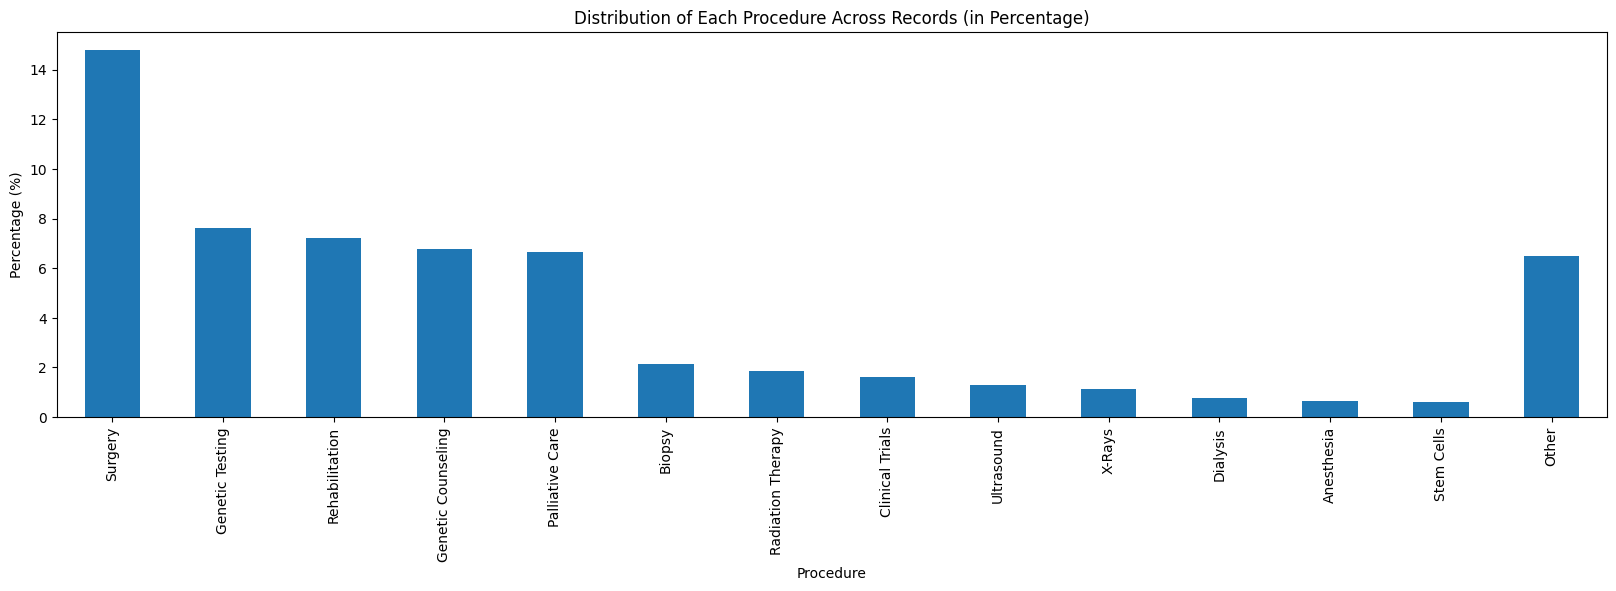

In [7]:
calc_hist(df, 'Procedure', EMPTY_HIST_THRESHOLD_PROCEDURE,other_bar=True)

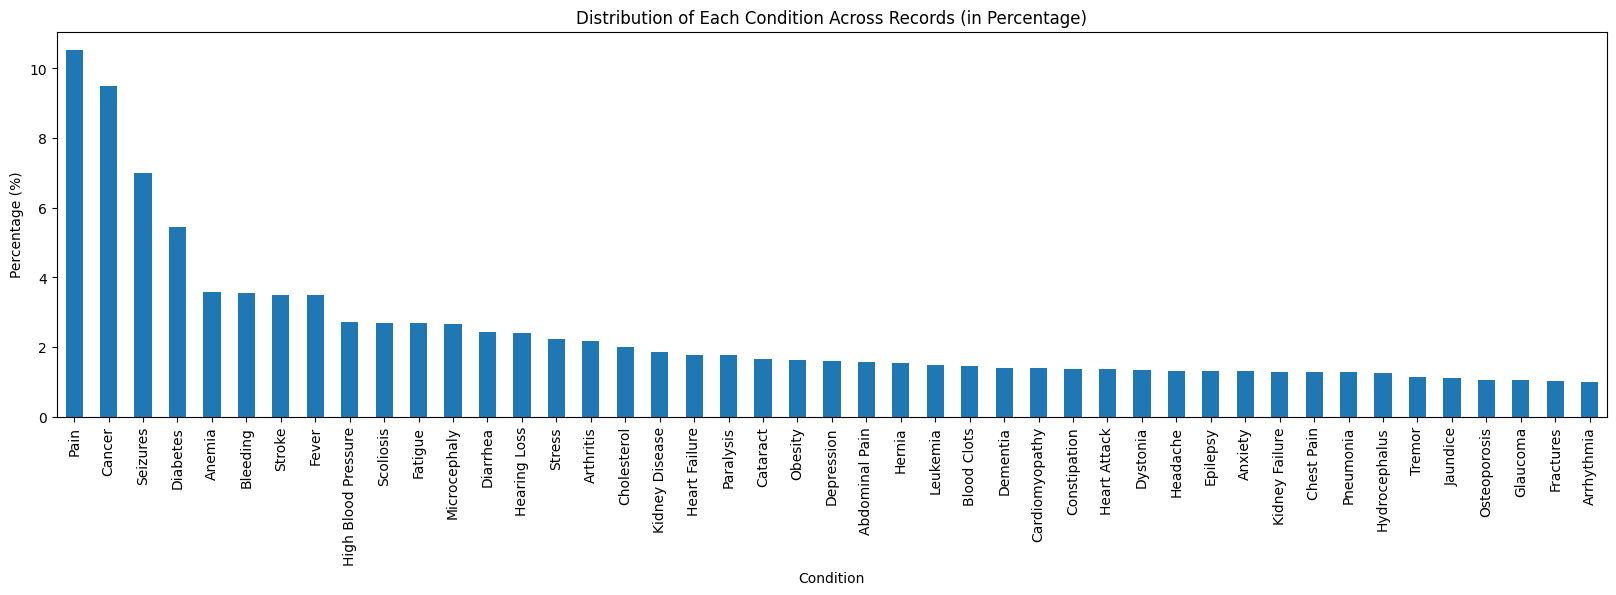

In [8]:
calc_hist(df, 'Condition', EMPTY_HIST_THRESHOLD_CONDITION, other_bar=False)

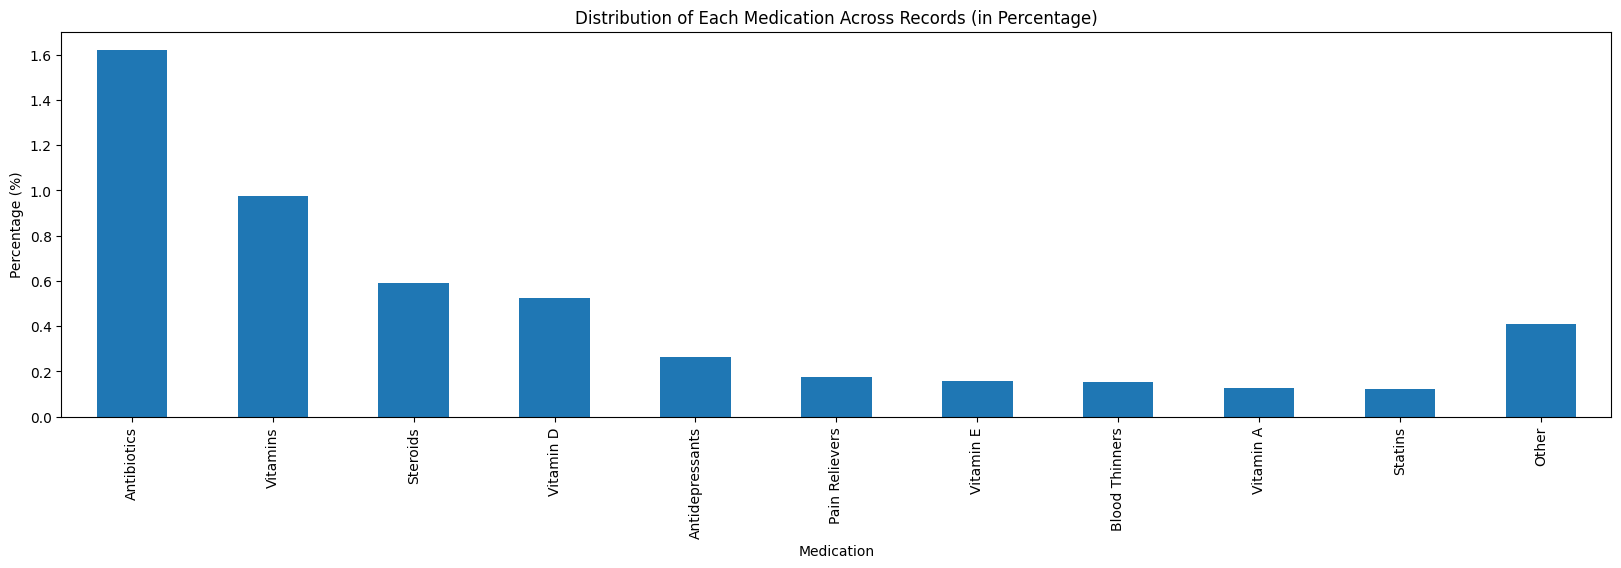

In [9]:
calc_hist(df, 'Medication', EMPTY_HIST_THRESHOLD_MEDICATION,other_bar=True)

# Text

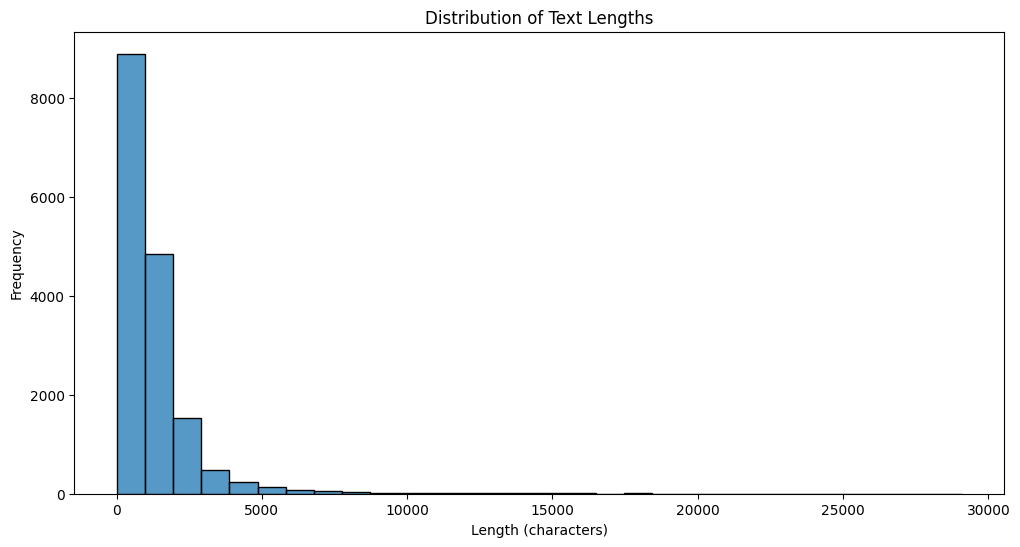


Average text length: 1303.82 characters
Median text length: 888.0 characters
Min text length: 6 characters
Max text length: 29094 characters


In [10]:
# Text length analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

print(f"\nAverage text length: {df['text_length'].mean():.2f} characters")
print(f"Median text length: {df['text_length'].median()} characters")
print(f"Min text length: {df['text_length'].min()} characters")
print(f"Max text length: {df['text_length'].max()} characters")

In [11]:
for idx, row in df.iterrows():
    tot_row_ent = set()
    
    for col_ent in ['Condition', 'Procedure', 'Medication']:
        col_count = col_ent + '_counts'

        if row[col_count]:
            tot_row_ent.update(row[col_ent])  # flatten list into the set
        else:
            tot_row_ent.update(row[col_ent])  # do the same even if it's zero (can skip if needed)

    print('-'*30 +' ' + str(tot_row_ent) +' ' + '-'*30)
    print(row['text'])
    print('\n')
    if idx == 5:
        break

------------------------------ {'Urinary Tract Infections', 'Glaucoma', 'High Blood Pressure'} ------------------------------
glaucoma and also High Blood Pressure and alcohol and urinary tract infections


------------------------------ {'Glaucoma'} ------------------------------
Nearly 2.7 million people have glaucoma, a leading cause of blindness in the United States. Although anyone can get glaucoma, some people are at higher risk. They include - African-Americans over age 40  - everyone over age 60, especially Hispanics/Latinos  - people with a family history of glaucoma. African-Americans over age 40 everyone over age 60, especially Hispanics/Latinos people with a family history of glaucoma.  In addition to age, eye pressure is a risk factor. Whether you develop glaucoma depends on the level of pressure your optic nerve can tolerate without being damaged. This level is different for each person. Thats why a comprehensive dilated eye exam is very important. It can help your eye ca

# Check if the exact words match in the text

In [12]:
calc_exact_match(df)

Final Statistics:
Total rows processed: 13744
Rows with 100% match: 13744 (100.00%)
Average match percentage across rows: 100.00%


In [13]:
uniqe_phrases = set().union(*df['Condition']).union(*df['Procedure']).union(*df['Medication'])

matches = []

# Compare each phrase with all the others
for i, phrase in enumerate(uniqe_phrases):
    for j, other_phrase in enumerate(uniqe_phrases):
        if i != j:  # Ensure we don't compare the phrase with itself
            # Check using lower() to perform a case-insensitive search.
            if phrase.lower() in other_phrase.lower():
                matches.append((phrase, other_phrase))
                
print(f'percentage of phrase inside another phrase: {len(matches)}/{len(uniqe_phrases)} = {round(len(matches)/len(uniqe_phrases),2)}')

percentage of phrase inside another phrase: 1142/3341 = 0.34


In [19]:
counts = 0
for idx, row in df.iterrows():
    tot_row_ent = set()
    
    for col_ent in ['Condition', 'Procedure', 'Medication']:
        col_count = col_ent + '_counts'

        if row[col_count]:
            tot_row_ent.update(row[col_ent])  # flatten list into the set
        else:
            tot_row_ent.update(row[col_ent])  # do the same even if it's zero (can skip if needed)

    if 'Bone Cancer' in row['text']:
        print('-'*30 +' ' + str(tot_row_ent) +' ' + '-'*30)
        print(row['text'])
        print('\n')
        counts += 1
        if counts == 1:
            break

------------------------------ {'Clinical Trials', 'Radiation Therapy', 'Bone Cancer', 'Rehabilitation', 'Pain', 'Osteosarcoma and Malignant Fibrous Histiocytoma of Bone', 'Surgery', 'X-Rays', 'Cancer', 'Stem Cells'} ------------------------------
Key Points
                    - There are different types of treatment for patients with osteosarcoma or malignant fibrous histiocytoma (MFH) of bone.    - Children with osteosarcoma or MFH should have their treatment planned by a team of health care providers who are experts in treating cancer in children.     - Treatment for osteosarcoma or malignant fibrous histiocytoma may cause side effects.    - Four types of standard treatment are used:         - Surgery     - Chemotherapy     - Radiation therapy     - Samarium        - New types of treatment are being tested in clinical trials.          - Targeted therapy         - Patients may want to think about taking part in a clinical trial.    - Patients can enter clinical trials before, during

In [20]:
df2 = df.copy()


def substring_entity_analysis(row):
    # Combine phrases from the three columns.
    phrases = []
    for col in ['Condition', 'Procedure', 'Medication']:
        cell = row[col]
        if isinstance(cell, list):
            phrases.extend(cell)
        elif pd.notnull(cell):
            phrases.append(cell)
    
    # Remove duplicates.
    phrases = list(set(phrases))
    
    # Count how many entities (phrases) are a substring of another
    substring_entity_count = 0
    for i in range(len(phrases)):
        current_phrase = phrases[i].lower()
        # Check if this phrase is contained in any other phrase.
        for j in range(len(phrases)):
            if i != j:
                if current_phrase in phrases[j].lower():
                    substring_entity_count += 1
                    break  # Stop after the first match
    total_entities = len(phrases)
    percent_entity = (substring_entity_count / total_entities * 100) if total_entities > 0 else 0

    return pd.Series({
        'substring_entities_count': substring_entity_count,
        'total_entities': total_entities,
        'percent_substring_entities': percent_entity,
        'row_has_substring': substring_entity_count > 0
    })

# Apply the per-row analysis.
results = df2.apply(substring_entity_analysis, axis=1)
df2 = pd.concat([df2, results], axis=1)

# Compute overall statistics:
# 1. Percentage of rows that contain at least one substring entity.
percentage_rows = df2['row_has_substring'].mean() * 100

# 2. Overall percentage of substring entities among all entities.
total_substring_entities = df2['substring_entities_count'].sum()
total_entities = df2['total_entities'].sum()
overall_percent_entities = (total_substring_entities / total_entities * 100) if total_entities > 0 else 0

# Output results.
print("Number of rows:", len(df2))
print(f"Rows with at least one substring entity: {df2['row_has_substring'].sum()} ({percentage_rows:.2f}%)")
print(f"Overall percentage of substring entities among all entities: {overall_percent_entities:.2f}%")

Number of rows: 16406
Rows with at least one substring entity: 3679 (22.42%)
Overall percentage of substring entities among all entities: 8.46%


In [47]:
df.iloc[23:28]

,text,Condition,Procedure,Medication,Procedure_counts,Condition_counts,Medication_counts
23,You can take steps to help prevent high blood ...,"[High Blood Pressure, Stress]",[Healthy Aging],[],0.0,2.0,0.0
24,"If you are diagnosed with high blood pressure,...",[High Blood Pressure],[],[Vitamins],0.0,0.0,0.0
25,High blood pressure is treated with lifestyle ...,[High Blood Pressure],[],[],0.0,0.0,0.0
26,"In most cases, the goal is probably to keep yo...","[High Blood Pressure, Diabetes, Kidney Disease...",[],[],0.0,4.0,0.0
27,"Today, many different types of medicines are a...",[High Blood Pressure],[],[Blood Pressure Medicines],0.0,0.0,0.0


In [ ]:
from helper import read_train_test_split

X_train, y_train, X_test, y_test = read_train_test_split()


In [25]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import wasserstein_distance, ks_2samp
import matplotlib.pyplot as plt

def calculate_entity_balance(y_train, y_test):
    entity_types = ["Condition", "Procedure", "Medication"]
    results = {}
    
    for entity_type in entity_types:
        print(f"\nAnalyzing {entity_type} entities...")
        
        # Get all unique entities from training and test sets
        train_entities = []
        for entities_list in y_train[entity_type]:
            if isinstance(entities_list, list):  # Handle potential NaN or empty cells
                train_entities.extend(entities_list)
                
        test_entities = []
        for entities_list in y_test[entity_type]:
            if isinstance(entities_list, list):
                test_entities.extend(entities_list)
        
        # Count occurrences of each entity
        train_counter = Counter(train_entities)
        test_counter = Counter(test_entities)
        
        # Get unique entities across both sets
        all_entities = set(train_counter.keys()) | set(test_counter.keys())
        
        # Calculate metrics
        train_total = len(train_entities)
        test_total = len(test_entities)
        
        # Normalize counts to get distributions
        train_dist = {entity: train_counter.get(entity, 0) / train_total 
                      for entity in all_entities}
        test_dist = {entity: test_counter.get(entity, 0) / test_total 
                     for entity in all_entities}
        
        # Coverage metrics
        train_coverage = len(train_counter) / len(all_entities)
        test_coverage = len(test_counter) / len(all_entities)
        shared_entities = set(train_counter.keys()) & set(test_counter.keys())
        overlap_ratio = len(shared_entities) / len(all_entities)
        
        # Distribution similarity metrics
        all_entities_list = list(all_entities)
        train_values = [train_dist.get(entity, 0) for entity in all_entities_list]
        test_values = [test_dist.get(entity, 0) for entity in all_entities_list]
        
        # Earth Mover's Distance (Wasserstein) - lower is better
        emd = wasserstein_distance(train_values, test_values)
        
        # Kolmogorov-Smirnov statistic - lower is better
        ks_stat, ks_pvalue = ks_2samp(train_values, test_values)
        
        # Jensen-Shannon Divergence - lower is better
        train_array = np.array(train_values)
        test_array = np.array(test_values)
        m = 0.5 * (train_array + test_array)
        
        # Safe log function that returns 0 when x is 0
        def safe_log(x, base=np.e):
            return np.log(x, out=np.zeros_like(x), where=(x!=0))
            
        # Calculate KL divergence safely
        def kl_divergence(p, q):
            # Only consider indices where p > 0 (as 0*log(0/q) = 0)
            non_zero = p > 0
            safe_q = np.copy(q)
            # Replace 0s in q with a small value where corresponding p > 0
            safe_q[non_zero & (safe_q == 0)] = 1e-10
            return np.sum(p[non_zero] * safe_log(p[non_zero] / safe_q[non_zero]))
            
        # Calculate JS divergence
        js_div = 0.5 * kl_divergence(train_array, m) + 0.5 * kl_divergence(test_array, m)
        
        # Calculate a composite balance score (0-100)
        # Lower EMD, KS and JS div are better, higher overlap is better
        # Normalize each metric to 0-1 range (assuming EMD and JS div <= 1)
        normalized_emd = 1 - min(emd, 1)
        normalized_ks = 1 - ks_stat
        normalized_js = 1 - min(js_div, 1)
        
        balance_score = (normalized_emd * 0.3 + 
                         normalized_ks * 0.2 + 
                         normalized_js * 0.2 + 
                         overlap_ratio * 0.3) * 100
        
        results[entity_type] = {
            "unique_in_train": len(train_counter),
            "unique_in_test": len(test_counter),
            "total_unique": len(all_entities),
            "shared_entities": len(shared_entities),
            "overlap_ratio": overlap_ratio,
            "earth_movers_distance": emd,
            "ks_statistic": ks_stat,
            "ks_pvalue": ks_pvalue,
            "jensen_shannon_div": js_div,
            "balance_score": balance_score
        }
        
        # Print summary for this entity type
        print(f"  Train unique: {len(train_counter)}, Test unique: {len(test_counter)}")
        print(f"  Shared entities: {len(shared_entities)} ({overlap_ratio:.2%} overlap)")
        print(f"  Balance score: {balance_score:.1f}/100")
    
    # Create visual comparison
    create_balance_visualization(results)
    
    return results

def create_balance_visualization(results):
    # Create a bar chart comparing balance scores
    entity_types = list(results.keys())
    balance_scores = [results[et]["balance_score"] for et in entity_types]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(entity_types, balance_scores, color=['#3498db', '#2ecc71', '#e74c3c'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}', ha='center', va='bottom')
    
    plt.title('Entity Type Balance Score (Train vs Test)')
    plt.ylabel('Balance Score (0-100)')
    plt.ylim(0, 110)  # Set y limit to accommodate the labels
    plt.axhline(y=70, color='r', linestyle='--', alpha=0.5)  # Reference line for "good" balance
    
    # Add a text box for interpretation guide
    plt.figtext(0.15, 0.02, 
                ">80: Excellent balance\n70-80: Good balance\n60-70: Moderate balance\n<60: Poor balance",
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('entity_balance_scores.png')
    plt.close()
    
    # Create another chart showing overlap ratios
    overlap_ratios = [results[et]["overlap_ratio"] * 100 for et in entity_types]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(entity_types, overlap_ratios, color=['#3498db', '#2ecc71', '#e74c3c'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom')
    
    plt.title('Entity Overlap Between Train and Test Sets')
    plt.ylabel('Overlap Percentage (%)')
    plt.ylim(0, 110)
    
    plt.tight_layout()
    plt.savefig('entity_overlap_ratios.png')
    plt.close()

# Usage
balance_results = calculate_entity_balance(y_train, y_test)

# Print detailed results in a formatted table
print("\nDetailed Balance Scores:")
print("-" * 80)
print(f"{'Entity Type':<15} {'Balance Score':<15} {'Overlap %':<15} {'EMD':<15} {'KS Stat':<15}")
print("-" * 80)
for entity_type, metrics in balance_results.items():
    print(f"{entity_type:<15} {metrics['balance_score']:<15.1f} {metrics['overlap_ratio']*100:<15.1f} {metrics['earth_movers_distance']:<15.4f} {metrics['ks_statistic']:<15.4f}")


Analyzing Condition entities...
  Train unique: 3092, Test unique: 1383
  Shared entities: 1244 (38.50% overlap)
  Balance score: 69.7/100

Analyzing Procedure entities...
  Train unique: 92, Test unique: 66
  Shared entities: 65 (69.89% overlap)
  Balance score: 85.2/100

Analyzing Medication entities...
  Train unique: 17, Test unique: 16
  Shared entities: 16 (94.12% overlap)
  Balance score: 93.0/100

Detailed Balance Scores:
--------------------------------------------------------------------------------
Entity Type     Balance Score   Overlap %       EMD             KS Stat        
--------------------------------------------------------------------------------
Condition       69.7            38.5            0.0000          0.5289         
Procedure       85.2            69.9            0.0007          0.2796         
Medication      93.0            94.1            0.0108          0.2353         
